In [1]:
import networkx as nx
import math
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import det
from numpy import cov

In [2]:
data = sio.loadmat('Market.mat')['DI']
data.shape

(7, 190, 12)

In [3]:
T = 7
P = 190
N = 12

In [4]:
#the nodes are the companies:
vertex_set = [i for i in range(12)]
G = nx.DiGraph()
for v in vertex_set:
    G.add_node(v)

In [5]:
all_nodes = set(vertex_set)

In [6]:
I = np.zeros((N,N))

In [7]:
for i in vertex_set:
    for j in vertex_set:
        if i == j:
            continue
        else:
            s_x = {i}
            s_y = {j}
            s_z = all_nodes - s_x - s_y
            x_t = data[:,:,i]  #company i
            y_t = data[:,:,j]  #company j

            z_t = [] #remaining companies
            for k in s_z:
                z_t.append(data[:,:,k])
                
            z_t = np.asarray(z_t)
            
            k = 0
            for t in np.arange(1,T):
                if t == 1:
                    m1 = np.concatenate((y_t[1,:].reshape(-1,P),z_t[:,0,:].reshape(-1,P)))
                    m2 = np.concatenate( (x_t[0,:].reshape(-1,P) , np.concatenate((y_t[0,:].reshape(-1,P),z_t[:,0,:].reshape(-1,P)))) )
                    m3 = np.concatenate((y_t[0,:].reshape(-1,P),z_t[:,0,:].reshape(-1,P)))
                    m4 = np.concatenate( (x_t[0,:].reshape(-1,P) , np.concatenate((y_t[1,:].reshape(-1,P),z_t[:,0,:].reshape(-1,P)))) )
                    
                    c1 = cov(m1)
                    d1 = det(c1)

                    c2 = cov(m2)
                    d2 = det(c2)

                    c3 = cov(m3)
                    d3 = det(c3)

                    c4 = cov(m4)                
                    d4 = det(c4)
                else:
                    m1 = np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,P)))
                    m2 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,P)))) )
                    m3 = np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,P)))
                    m4 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,P)))) )

                    c1 = cov(m1)
                    d1 = det(c1)

                    c2 = cov(m2)
                    d2 = det(c2)

                    c3 = cov(m3)
                    d3 = det(c3)

                    c4 = cov(m4)                
                    d4 = det(c4)
                
                k += np.log( (d1 * d2) / (d3 * d4) )
                #print("DI of {} to {}".format(i,j),"t=",t,"k=",k)
                #print("d3=",d3,"d4=",d4,"d3 * d4=",d3*d4 )
            
            DI = 0.5 * k
            I[i,j] = DI
        

In [8]:
I

array([[ 0.        ,  0.23507046,  0.17483889,  0.27290329,  0.72776716,
         0.63968945,  0.78977944,  1.04550315,  0.8785718 ,  0.33339351,
         0.54989326,  0.07893514],
       [ 0.21885977,  0.        ,  0.09028252,  0.3288704 ,  0.18547153,
         0.11066201,  0.04791517,  0.17094645,  0.16411085,  0.05393045,
         0.10649518,  0.09018261],
       [ 0.16667508,  0.33244681,  0.        ,  0.14106721,  0.85861797,
         0.03720166,  0.19772841,  0.33728119,  0.19252116,  0.58282992,
         0.27334461,  0.27849385],
       [ 0.19591557,  0.19548238,  0.27859062,  0.        ,  0.22398203,
         0.12058419,  0.22502819,  0.23373022,  0.27918384,  0.21005262,
         0.18378817,  0.19118076],
       [ 0.42273462,  0.23425386,  0.20236732,  0.29521909,  0.        ,
         0.28140874,  0.32324416,  0.35011919,  0.37325302,  0.35683259,
         0.31789225,  0.18336669],
       [ 0.3059094 ,  0.26444761,  0.01956455,  0.37060034,  0.30545841,
         0.        ,  

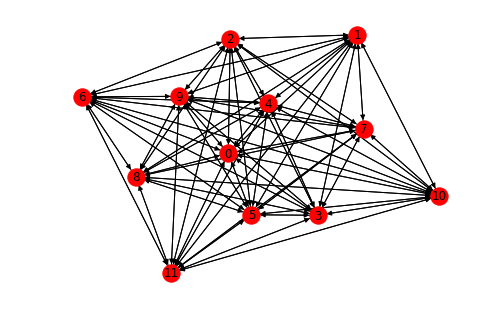

In [9]:
for i in vertex_set:
    for j in vertex_set:
        G.add_edge(i, j, weight = I[i,j])
nx.draw(G, with_labels = True)